<a href="https://colab.research.google.com/github/Anderson-Andre-P/IMDB-Data-Analysis/blob/main/IMDB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB - Internet Movie Database

O IMDB é um banco de dados online de informações relacionadas a filmes, séries de televisão, vídeos caseiros, videogames e conteúdo de streaming online – incluindo elenco, equipe de produção e biografias pessoais, resumos de enredos, curiosidades, classificações e críticas de fãs e críticas.

#1. Carregando os dados

Importando a biblioteca necessárias para carregar o banco de dados e fazer as contas matemáticas e plotar os gráficos:

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

Carregando e exibindo os dados:

In [ ]:
uploaded = files.upload()

Saving IMDB-Movie-Data.csv to IMDB-Movie-Data.csv


In [ ]:
uri = "/content/IMDB-Movie-Data.csv"

In [ ]:
df = pd.read_csv(uri)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


As colunas do banco de dados estão em inglês, então acho interessante modificar elas para o Português-BR para facilitar a visualização dos dados e a manusebilidade do dataframe.

In [ ]:
df2 = df.rename(columns = {'Rank': 'Classificação', 'Title': 'Título', 'Genre': 'Gênero', 'Description': 'Descrição', 'Director': 'Diretor', 'Actors': 'Atores', 'Year': 'Ano de lançamento', 'Runtime (Minutes)': 'Tempo de execução em minutos', 'Rating': 'Avaliação', 'Votes': 'Votos', 'Revenue (Millions)': 'Receita em milhões', 'Metascore': 'Metascore'})

In [ ]:
df2.head(1)

,Classificação,Título,Gênero,Descrição,Diretor,Atores,Ano de lançamento,Tempo de execução em minutos,Avaliação,Votos,Receita em milhões,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


Com o banco carregado, é interessante fazer uma rápida descrição dos dados:



*   Classificação: é o índice de cada filme do banco de dados
*   Título:  é o nome de cada filme
*   Gênero: são os tipos de cada filme
*   Descrição: é um breve resumo do filme
*   Diretor: é o responsável por dirigir o filme
*   Atores: são os principais atores do filme
*   Ano de lançamento: ano que o filme foi lançado
*   Tempo de execução em minutos: é o tempo total do filme em minutos
*   Avaliação: é a nota que o filme recebeu ao ser avaliado
*   Votos: é a quantidade de pessoas que votaram no filme
*   Receita em milhões: é o lucro obtido pelo filme
*   Metascore: é uma outra nota obtida pelo filme



#2. Preparando os dados

Antes de qualquer preparo, é essencial levantar algumas informações básicas do dataframe para avaliarmos com que tipos de dados estamos lidando.

Tamanho do dataframe:

In [ ]:
df2.shape

(1000, 12)

Quantidade de nulos

In [ ]:
df.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

Verificando onde tem valores faltando

In [ ]:
df2.isnull()

,Classificação,Título,Gênero,Descrição,Diretor,Atores,Ano de lançamento,Tempo de execução em minutos,Avaliação,Votos,Receita em milhões,Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


Removendo dados faltando

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.shape

(838, 12)

Tipos de dados

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Classificação                 838 non-null    int64  
 1   Título                        838 non-null    object 
 2   Gênero                        838 non-null    object 
 3   Descrição                     838 non-null    object 
 4   Diretor                       838 non-null    object 
 5   Atores                        838 non-null    object 
 6   Ano de lançamento             838 non-null    int64  
 7   Tempo de execução em minutos  838 non-null    int64  
 8   Avaliação                     838 non-null    float64
 9   Votos                         838 non-null    int64  
 10  Receita em milhões            838 non-null    float64
 11  Metascore                     838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


# 3. Analisando os dados

Podemos começar essa etapa com uma análise descritiva dos dados numéricos:

In [ ]:
df2.describe()

,Classificação,Ano de lançamento,Tempo de execução em minutos,Avaliação,Votos,Receita em milhões,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
df2['Título'].value_counts()

The Host                    2
Blood Father                1
Unfriended                  1
American Reunion            1
The Pursuit of Happyness    1
                           ..
The 5th Wave                1
The Visit                   1
Fast Five                   1
Step Up                     1
Nine Lives                  1
Name: Título, Length: 837, dtype: int64

In [ ]:
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
996    False
997    False
999    False
Length: 838, dtype: bool

In [ ]:
x = df2['Título'].drop_duplicates()
x.value_counts()

Guardians of the Galaxy     1
Blood Father                1
Unfriended                  1
American Reunion            1
The Pursuit of Happyness    1
                           ..
The 5th Wave                1
The Visit                   1
Fast Five                   1
Step Up                     1
Nine Lives                  1
Name: Título, Length: 837, dtype: int64

In [ ]:
df2['Gênero'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Gênero, Length: 189, dtype: int64

In [ ]:
df2['Atores'].value_counts()

Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                   1
                                                                      ..
Chris Evans, Jamie Bell, Tilda Swinton, Ed Harris                      1
Chloë Grace Moretz, Matthew Zuk, Gabriela Lopez,Bailey Anne Borders    1
Olivia DeJonge, Ed Oxenbould, Deanna Dunagan, Peter McRobbie           1
Vin Diesel, Paul Walker, Dwayne Johnson, Jordana Brewster              1
Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines               1
Name: Atores, Length: 834, dtype: int64

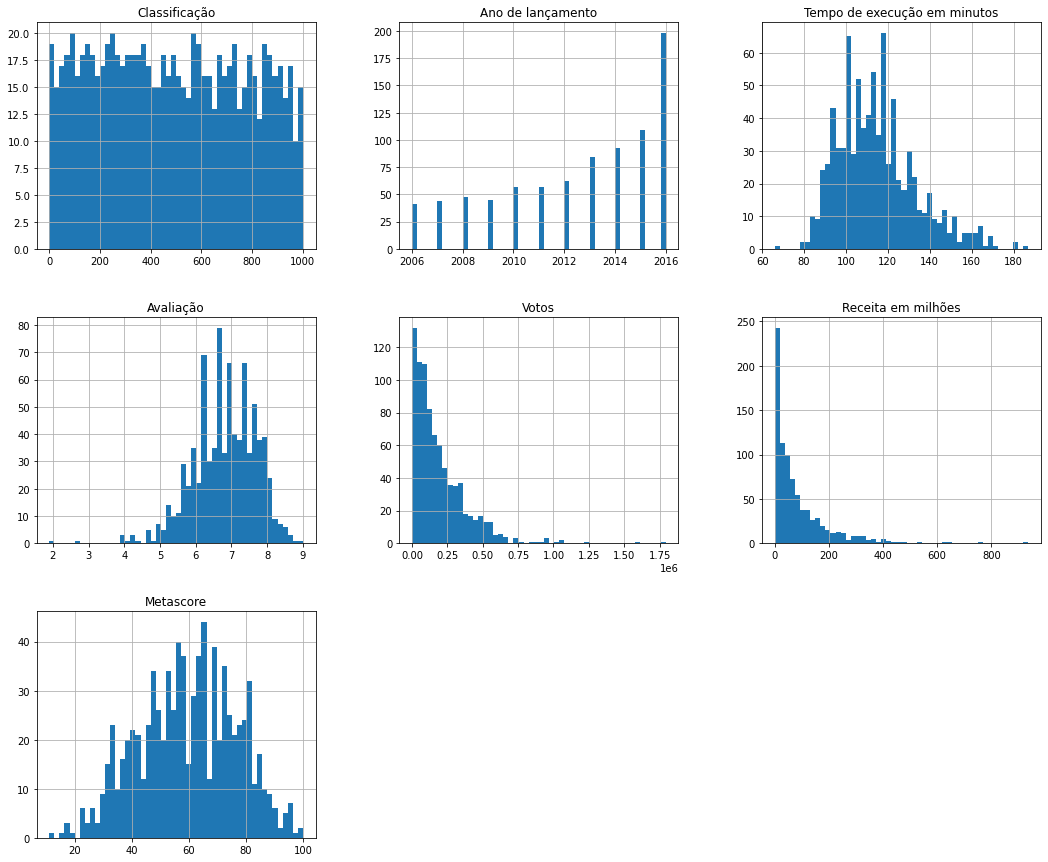

In [ ]:
df2.hist(bins=50, figsize=(18,15))
plt.show()

In [ ]:
corr_time = df2.corr()

In [ ]:
corr_time

,Classificação,Ano de lançamento,Tempo de execução em minutos,Avaliação,Votos,Receita em milhões,Metascore
Classificação,1.000000,-0.312809,-0.254783,-0.243125,-0.303284,-0.273170,-0.195909
Ano de lançamento,-0.312809,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303
Tempo de execução em minutos,-0.254783,-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397
Avaliação,-0.243125,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731
Votos,-0.303284,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674
Receita em milhões,-0.273170,-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000


In [ ]:
corr_time['Tempo de execução em minutos'].sort_values(ascending=False)

Tempo de execução em minutos    1.000000
Votos                           0.399298
Avaliação                       0.374566
Receita em milhões              0.281721
Metascore                       0.221397
Ano de lançamento              -0.101933
Classificação                  -0.254783
Name: Tempo de execução em minutos, dtype: float64

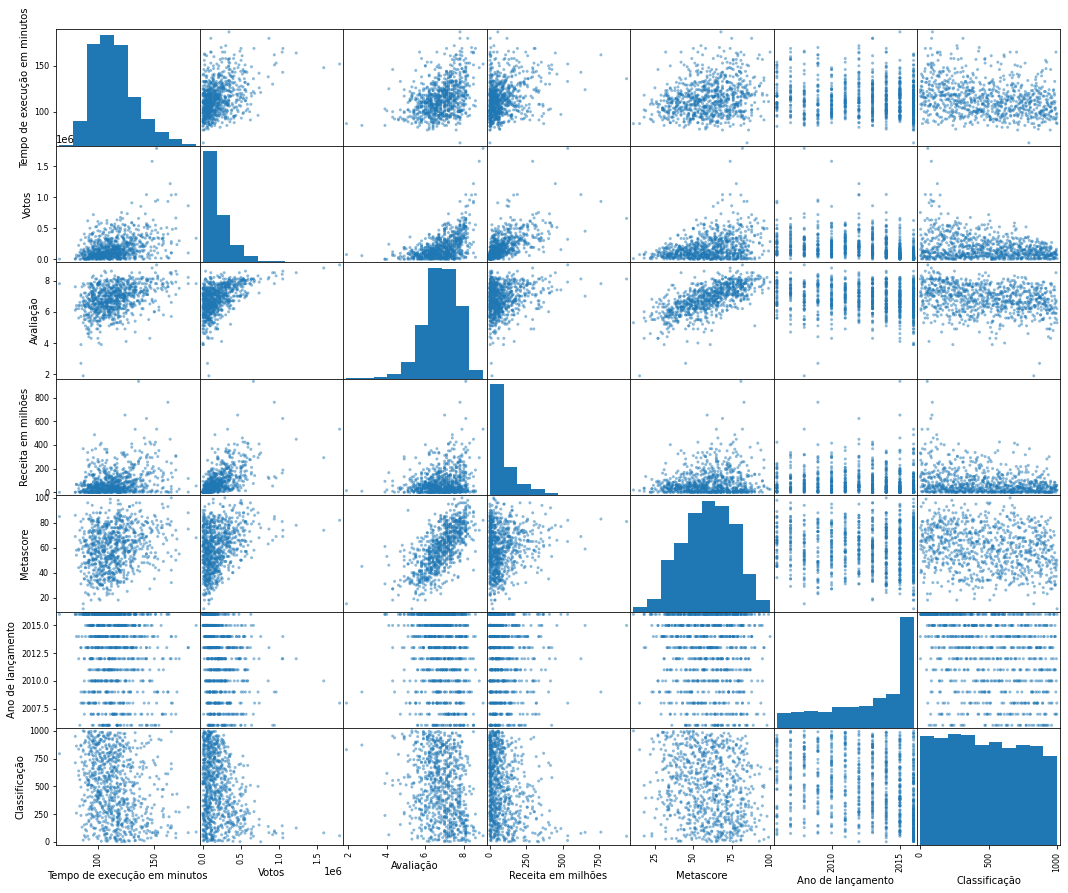

In [ ]:
data = ['Tempo de execução em minutos', 'Votos', 'Avaliação', 'Receita em milhões', 'Metascore', 'Ano de lançamento', 'Classificação']

scatter_matrix(df2[data], figsize=(18, 15))
plt.show()

#4. Enriquecendo os dados

É interessante enriquecer os dados para te ajudar a fazer as análises

In [ ]:
def rating(x):
    if x >= 8.0:
        return "Muito bom"
    elif x >= 5.0:
        return "Mediano"
    else:
        return "Ruim"

In [ ]:
df2['Resultado da avaliação'] = df2['Avaliação'].apply(rating)

In [ ]:
df2.head()

,Classificação,Título,Gênero,Descrição,Diretor,Atores,Ano de lançamento,Tempo de execução em minutos,Avaliação,Votos,Receita em milhões,Metascore,Resultado da avaliação
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Muito bom
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Mediano
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Mediano
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Mediano
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Mediano


#5. Resolvendo o trabalho

Para realizar o trabalho é necessário separar os dados do dataframe em duas variáveis diferentes: um X e um Y, de acordo com o problema a ser resolvido.

In [ ]:
y = df2["Avaliação"]
x = df2.iloc[:, 0:-1]

2.a. Mostre apenas as três últimas colunas e as 3 últimas linhas usando o comando iloc;

In [ ]:
df2.iloc[-3:, -3:]

,Receita em milhões,Metascore,Resultado da avaliação
996,17.54,46.0,Mediano
997,58.01,50.0,Mediano
999,19.64,11.0,Mediano


2.b. Mostre apenas as três últimas colunas e as 3 últimas linhas utilizando o nome da coluna e tail(), sem
usar iloc;

In [ ]:
df2[["Votos", "Receita em milhões", "Metascore"]].tail(3)

,Votos,Receita em milhões,Metascore
996,73152,17.54,46.0
997,70699,58.01,50.0
999,12435,19.64,11.0


2.c. Mostre o Título, Diretor e Rank do filme, desde que a o Rank seja maior que 8;

In [ ]:
df2[['Título', 'Diretor', 'Classificação']][df2.Avaliação > 8]

,Título,Diretor,Classificação
0,Guardians of the Galaxy,James Gunn,1
6,La La Land,Damien Chazelle,7
16,Hacksaw Ridge,Mel Gibson,17
18,Lion,Garth Davis,19
36,Interstellar,Christopher Nolan,37
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,51
54,The Dark Knight,Christopher Nolan,55
64,The Prestige,Christopher Nolan,65
67,Mad Max: Fury Road,George Miller,68
74,Zootopia,Byron Howard,75


In [ ]:
df2[['Título', 'Diretor', 'Classificação']].query('Classificação > 8')

,Título,Diretor,Classificação
8,The Lost City of Z,James Gray,9
9,Passengers,Morten Tyldum,10
10,Fantastic Beasts and Where to Find Them,David Yates,11
11,Hidden Figures,Theodore Melfi,12
12,Rogue One,Gareth Edwards,13
...,...,...,...
993,Resident Evil: Afterlife,Paul W.S. Anderson,994
994,Project X,Nima Nourizadeh,995
996,Hostel: Part II,Eli Roth,997
997,Step Up 2: The Streets,Jon M. Chu,998


In [ ]:
df2[['Título', 'Diretor', 'Classificação']].loc[(df2.Classificação > 8)]

,Título,Diretor,Classificação
8,The Lost City of Z,James Gray,9
9,Passengers,Morten Tyldum,10
10,Fantastic Beasts and Where to Find Them,David Yates,11
11,Hidden Figures,Theodore Melfi,12
12,Rogue One,Gareth Edwards,13
...,...,...,...
993,Resident Evil: Afterlife,Paul W.S. Anderson,994
994,Project X,Nima Nourizadeh,995
996,Hostel: Part II,Eli Roth,997
997,Step Up 2: The Streets,Jon M. Chu,998


2.d. Gere uma amostra aleatória dos dados considerando apenas as colunas Description, Year e Actor;

In [ ]:
df2[['Descrição', 'Ano de lançamento', 'Atores']].sample(10)

,Descrição,Ano de lançamento,Atores
906,A self-help seminar inspires a sixty-something...,2015,"Sally Field, Max Greenfield, Tyne Daly, Wendi ..."
725,"An imprisoned vampire, Barnabas Collins, is se...",2012,"Johnny Depp, Michelle Pfeiffer, Eva Green, Hel..."
329,A furloughed convict and his American and Chin...,2015,"Chris Hemsworth, Viola Davis, Wei Tang, Leehom..."
997,Romantic sparks occur between two dance studen...,2008,"Robert Hoffman, Briana Evigan, Cassie Ventura,..."
927,A suicidal American befriends a Japanese man l...,2015,"Matthew McConaughey, Naomi Watts, Ken Watanabe..."
720,The continuation of Joe's sexually dictated li...,2013,"Charlotte Gainsbourg, Stellan Skarsgård, Wille..."
694,A young man who survives a disaster at sea is ...,2012,"Suraj Sharma, Irrfan Khan, Adil Hussain, Tabu"
187,"In the aftermath of a family tragedy, an aspir...",2015,"Mia Wasikowska, Jessica Chastain, Tom Hiddlest..."
875,Six months after the rage virus was inflicted ...,2007,"Jeremy Renner, Rose Byrne, Robert Carlyle, Har..."
346,In a countryside town bordering on a magical l...,2007,"Charlie Cox, Claire Danes, Sienna Miller, Ian ..."


2.e. Mostre apenas as colunas Actor, Rating, Votes e Year em ordem crescente, de acordo com o ano;

In [ ]:
df2[['Atores', 'Avaliação', 'Votos', 'Ano de lançamento']].sort_values('Ano de lançamento', ascending=True)

,Atores,Avaliação,Votos,Ano de lançamento
559,"Luke Wilson, Maya Rudolph, Dax Shepard, Terry ...",6.6,115355,2006
727,"Edward Norton, Jessica Biel, Paul Giamatti, Ru...",7.6,309934,2006
715,"Elijah Wood, Brittany Murphy, Hugh Jackman, Ro...",6.5,141141,2006
471,"Kirsten Dunst, Jason Schwartzman, Rip Torn, Ju...",6.4,83941,2006
632,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",7.0,73491,2006
...,...,...,...,...
611,"Sandra Hüller, Peter Simonischek, Michael Witt...",7.6,24387,2016
171,"Charlize Theron, Art Parkinson, Matthew McCona...",7.9,72778,2016
447,"Sam Neill, Julian Dennison, Rima Te Wiata, Rac...",7.9,52331,2016
776,"Malcolm McDowell, Richard Brake, Jeff Daniel P...",5.1,10871,2016


2.f. Crie um dataframe df2 idêntico ao primeiro e delete as colunas Metascore, Revenue
(Millions),Votes, Rating, Runtime (Minutes);

In [ ]:
df3 = df.drop(columns=['Metascore', 'Revenue (Millions)', 'Votes', 'Rating', 'Runtime (Minutes)'])

In [ ]:
df3.head()

,Rank,Title,Genre,Description,Director,Actors,Year
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016


3.b. Faça uma consulta para mostrar apenas o Título e o Rank dos filmes com título maior que 7;

In [ ]:
df2[df2.Título.str.len() > 50]

,Classificação,Título,Gênero,Descrição,Diretor,Atores,Ano de lançamento,Tempo de execução em minutos,Avaliação,Votos,Receita em milhões,Metascore,Resultado da avaliação
259,260,Norman: The Moderate Rise and Tragic Fall of a...,"Drama,Thriller",Norman Oppenheimer is a small time operator wh...,Joseph Cedar,"Richard Gere, Lior Ashkenazi, Michael Sheen,Ch...",2016,118,7.1,664,2.27,76.0,Mediano
613,614,The Assassination of Jesse James by the Coward...,"Biography,Crime,Drama","Robert Ford, who's idolized Jesse James since ...",Andrew Dominik,"Brad Pitt, Casey Affleck, Sam Shepard, Mary-Lo...",2007,160,7.5,143564,3.90,68.0,Mediano
862,863,"Alexander and the Terrible, Horrible, No Good,...","Comedy,Family",Alexander's day begins with gum stuck in his h...,Miguel Arteta,"Steve Carell, Jennifer Garner, Ed Oxenbould, D...",2014,81,6.2,32310,66.95,54.0,Mediano


3.c. Faça uma consulta para mostras o Título, Rank e Diretor de filmes começados com a letra 'A';

In [ ]:
df2[['Título', 'Classificação', 'Diretor']][df2.Título.str.startswith('A')]

,Título,Classificação,Diretor
19,Arrival,20,Denis Villeneuve
29,Assassin's Creed,30,Justin Kurzel
71,Allied,72,Robert Zemeckis
72,A Monster Calls,73,J.A. Bayona
87,Avatar,88,James Cameron
94,Avengers: Age of Ultron,95,Joss Whedon
145,Ah-ga-ssi,146,Chan-wook Park
155,Aliens vs Predator - Requiem,156,Colin Strause
179,Ant-Man,180,Peyton Reed
201,A Cure for Wellness,202,Gore Verbinski


3.d. Faça uma consulta para mostrar o Título, Rank, Gênero e os Atores, desde que o nome dos atores termine com a letra 'a';

In [ ]:
df2['Atores'] = df2['Atores'].astype(str)

In [ ]:
df2['Atores'][1]

'Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron'

In [ ]:
df2[['Título', 'Classificação', 'Gênero', 'Atores']][df2.Atores.str.endswith('Theron')]

,Título,Classificação,Gênero,Atores
1,Prometheus,2,"Adventure,Mystery,Sci-Fi","Noomi Rapace, Logan Marshall-Green, Michael Fa..."


In [ ]:
actors = []

for name in df2['Atores']:
    actors += [(name)]

actors2 = []

for actor in actors:
    actors2 += actor.split(',')

actors2

['Chris Pratt',
 ' Vin Diesel',
 ' Bradley Cooper',
 ' Zoe Saldana',
 'Noomi Rapace',
 ' Logan Marshall-Green',
 ' Michael Fassbender',
 ' Charlize Theron',
 'James McAvoy',
 ' Anya Taylor-Joy',
 ' Haley Lu Richardson',
 ' Jessica Sula',
 'Matthew McConaughey',
 'Reese Witherspoon',
 ' Seth MacFarlane',
 ' Scarlett Johansson',
 'Will Smith',
 ' Jared Leto',
 ' Margot Robbie',
 ' Viola Davis',
 'Matt Damon',
 ' Tian Jing',
 ' Willem Dafoe',
 ' Andy Lau',
 'Ryan Gosling',
 ' Emma Stone',
 ' Rosemarie DeWitt',
 ' J.K. Simmons',
 'Charlie Hunnam',
 ' Robert Pattinson',
 ' Sienna Miller',
 ' Tom Holland',
 'Jennifer Lawrence',
 ' Chris Pratt',
 ' Michael Sheen',
 'Laurence Fishburne',
 'Eddie Redmayne',
 ' Katherine Waterston',
 ' Alison Sudol',
 'Dan Fogler',
 'Taraji P. Henson',
 ' Octavia Spencer',
 ' Janelle Monáe',
 'Kevin Costner',
 'Felicity Jones',
 ' Diego Luna',
 ' Alan Tudyk',
 ' Donnie Yen',
 "Auli'i Cravalho",
 ' Dwayne Johnson',
 ' Rachel House',
 ' Temuera Morrison',
 'Anne H

In [ ]:
def actores(x):
    return actor.split(',')

df2['Lista de atores'] = df2['Atores'].apply(actores)

In [ ]:
df2['Lista de atores']

0      [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
1      [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
2      [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
3      [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
4      [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
                             ...                        
993    [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
994    [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
996    [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
997    [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
999    [Kevin Spacey,  Jennifer Garner,  Robbie Amell...
Name: Lista de atores, Length: 838, dtype: object

In [ ]:
df2[['Título', 'Classificação', 'Gênero', 'Atores']][actors2.str.endswith('Freeman')]

AttributeError: ignored

3.e. Faça uma pesquisa na internet e descubra como plotar os valores de uma coluna em um gráfico;

3.f. Faça uma pesquisa na internet e descubra como plotar os valores da distribuição de uma
determinada coluna;

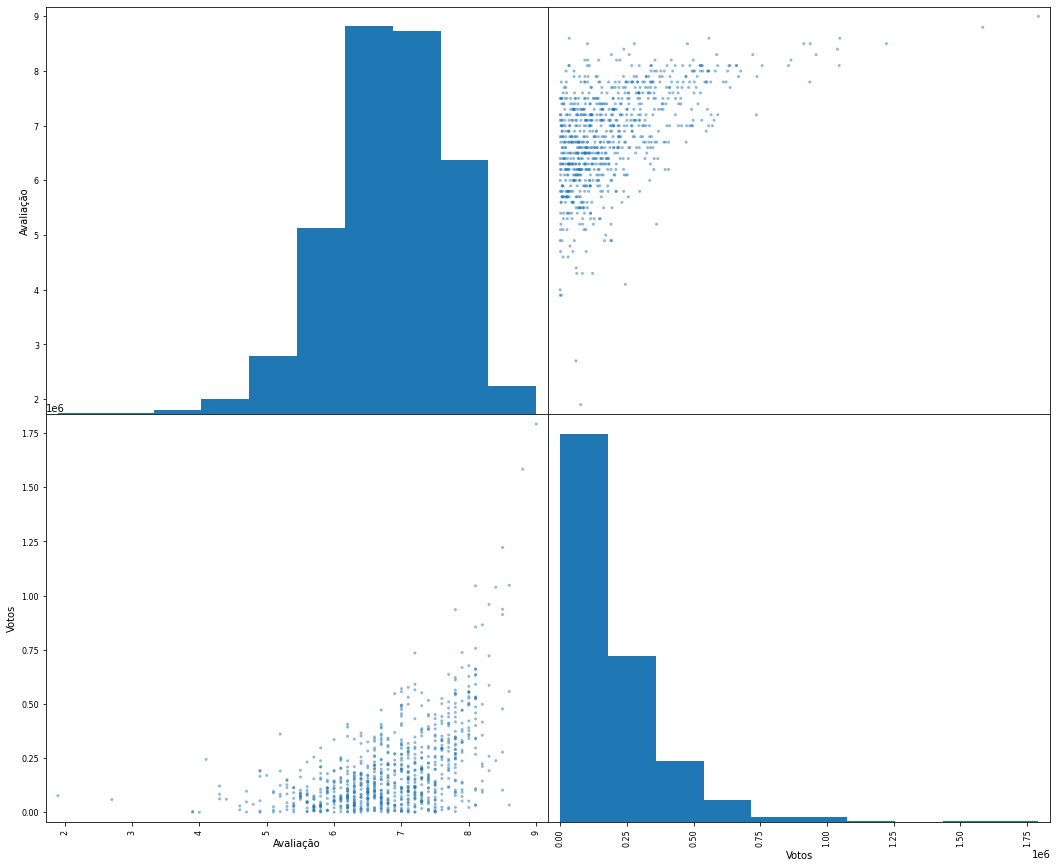

In [ ]:
scatter_matrix(df2[['Avaliação', 'Votos']], figsize=(18, 15))
plt.show()

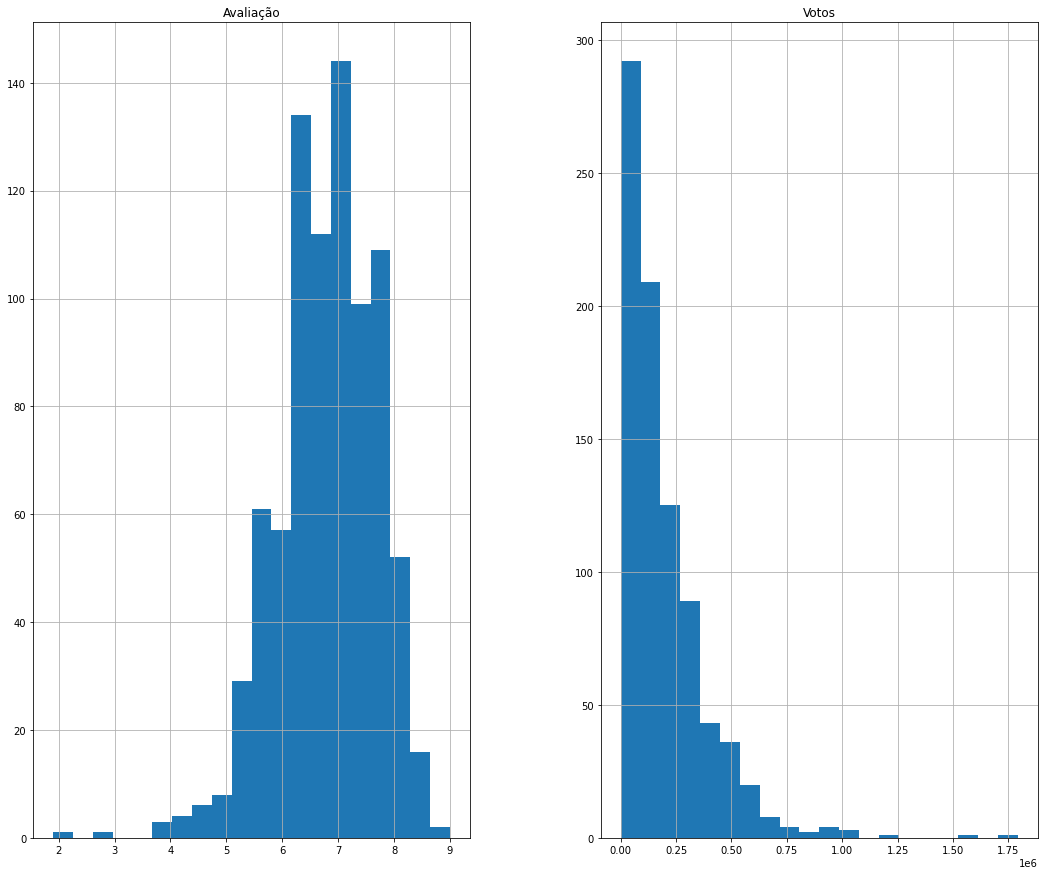

In [ ]:
df2[['Avaliação', 'Votos']].hist(bins=20, figsize=(18,15))
plt.show()

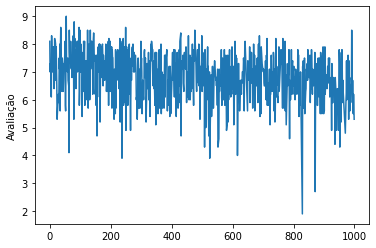

In [ ]:
plt.plot(df2['Avaliação'])
plt.ylabel('Avaliação')
plt.show()

In [ ]:
df2.head(1)

,Classificação,Título,Gênero,Descrição,Diretor,Atores,Ano de lançamento,Tempo de execução em minutos,Avaliação,Votos,Receita em milhões,Metascore,Resultado da avaliação,Lista de atores
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Muito bom,"[Kevin Spacey, Jennifer Garner, Robbie Amell..."


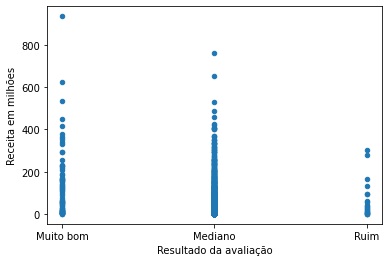

In [ ]:
df2.plot(kind='scatter', x='Resultado da avaliação', y='Receita em milhões')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


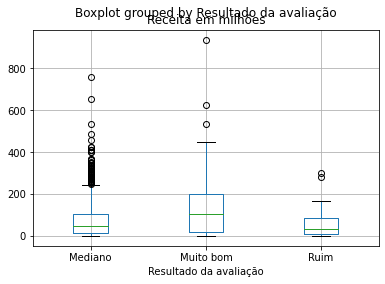

In [ ]:
df2.boxplot(column='Receita em milhões', by='Resultado da avaliação')